In [45]:
import numpy as np
import imageio as io
import scipy
from scipy import stats
import matplotlib.pyplot as plt

In [107]:
def disp(denoising_mode, m, local=False, dispn=None):
#     print(m)
    if denoising_mode == "average":
        d = np.std(m)
    elif denoising_mode == "robust":
        q75, q25 = np.percentile(m, [75 ,25])
        d = q75 - q25 
        
    if d == 0:
        d = 1 if not local else dispn
    
    return d 

In [4]:
def centr(m):
    if denoising_mode == "average":
        return np.mean(m)
    elif denoising_mode == "robust":
        return np.median(m)  

In [126]:
def ADF(img, gamma, denoising_mode, coord_disp, n):
    
    
    
    # 2. Calculate image's dispersion
    # 2.1 Calculate dispn, a fixed value 
    dispn = disp(denoising_mode, img[coord_disp[0]:coord_disp[1], coord_disp[2]:coord_disp[3]])
    
    # 1. Pad the image
    img = np.pad(img, (n,n), 'symmetric')
    
    M, N = img.shape
    
    # 2.2. Create an empty image
#     img_n = np.zeros((M-2*n,N-2*n)).astype(np.int32)
    img_n = np.zeros((M-2*n,N-2*n)).astype(np.uint8)
#     img_n = np.zeros((M-2*n,N-2*n))
    
    # 2.3. Loop over the empty image filling it with the new values
    for x in range(n, M-n):
        for y in range(n, N-n):
            displ = disp(denoising_mode, img[x-n:x+n, y-n:y+n], local=True, dispn=dispn)
            img_n[x-n,y-n] = img[x,y] - gamma*(dispn/displ)*(img[x,y] - centr(img[x-n:x+n, y-n:y+n]))
    
    return img_n
    

In [66]:
def RSE(g, R):
	assert g.shape == R.shape
	M, N = g.shape
	return np.sqrt(np.sum((g-R)**2)/(M*N))

In [94]:
img = deg_image
img_temp = img[coord_disp[0]:coord_disp[1], coord_disp[2]:coord_disp[3]]

img_temp = np.asarray([[1,2], [3,4]])
q75, q25 = np.percentile(img_temp, [75 ,25])
print(img_temp)
print(img_temp.shape)
print(np.std(img_temp))
print(q75 - q25)
print(np.mean(img_temp))
print(np.median(img_temp)  )


# dispn = disp(denoising_mode, img_temp)


[[1 2]
 [3 4]]
(2, 2)
1.118033988749895
1.5
2.5
2.5


In [132]:
# case1 5.392600407980945
# Path to the images. It is an user's input
reference_name = "input_images/polygons128.png"
degraded_name = "input_images/case1_10.png"

# Type of the filter
F = 1

# Gama parametr
gamma = 0.15

ref_image = io.imread(reference_name)
deg_image = io.imread(degraded_name)

if F == 1:
    coord_disp = [0, 20, 0, 20] 
    n = 5
    denoising_mode = "average" 
    result = ADF(deg_image, gamma, denoising_mode, coord_disp, n)
# else:
#     k = 
#     delta = 

In [134]:
# case2 21.875998861123463
# Path to the images. It is an user's input
reference_name = "input_images/polygons128.png"
degraded_name = "input_images/case2_45.png"

# Type of the filter
F = 1

# Gama parametr
gamma = 0.95

ref_image = io.imread(reference_name)
deg_image = io.imread(degraded_name)

if F == 1:
    coord_disp = [0, 20, 0, 20] 
    n = 5
    denoising_mode = "robust" 
    result = ADF(deg_image, gamma, denoising_mode, coord_disp, n)
# else:
#     k = 
#     delta = 

In [136]:
# case3 22.21161211822827
# Path to the images. It is an user's input
reference_name = "input_images/moon_small.jpg"
degraded_name = "input_images/case3_70.png"

# Type of the filter
F = 1

# Gama parametr
gamma = 0.8

ref_image = io.imread(reference_name)
deg_image = io.imread(degraded_name)

if F == 1:
    coord_disp = [0, 20, 0, 30] 
    n = 3
    denoising_mode = "robust" 
    result = ADF(deg_image, gamma, denoising_mode, coord_disp, n)
# else:
#     k = 
#     delta = 

In [138]:
# case4 20.17474964085773
# Path to the images. It is an user's input
reference_name = "input_images/moon_small.jpg"
degraded_name = "input_images/case3_70.png"

# Type of the filter
F = 1

# Gama parametr
gamma = 1.0

ref_image = io.imread(reference_name)
deg_image = io.imread(degraded_name)

if F == 1:
    coord_disp = [0, 20, 0, 30] 
    n = 3
    denoising_mode = "average" 
    result = ADF(deg_image, gamma, denoising_mode, coord_disp, n)
# else:
#     k = 
#     delta = 

21.98746202562099


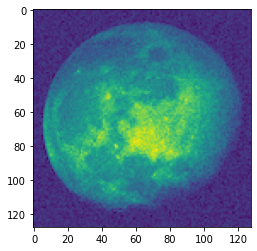

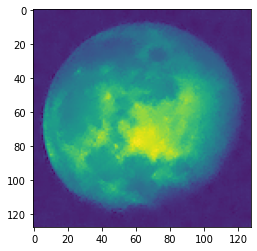

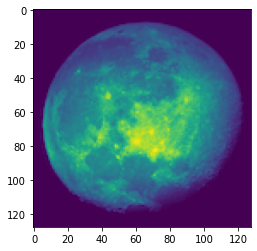

In [139]:
# 1 ok 
# 2 ok
# 3 ok
# 4 ok 

error = RSE(result.astype(np.int32), ref_image)
print(error)

plt.figure()
plt.imshow(deg_image) 
plt.show()

plt.figure()
plt.imshow(result) 
plt.show()

plt.figure()
plt.imshow(ref_image) 
plt.show()


In [117]:
print(RSE(ref_image, result))


22.36988299117746
